# Understanding Descriptive Statistics

Import the necessary libraries here:

In [34]:
# Libraries
import numpy as np
import random
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [35]:
# your code here

def dices(times):
    list1=[1,2,3,4,5,6]
    return random.choices(list1, k=times)

    #return random.choices(range(1,7),k=times)
    #times=11
df1=dices(10)
df1

[6, 4, 1, 1, 3, 5, 5, 6, 1, 5]

In [36]:

df1=pd.DataFrame(df1, columns=["value"]).sort_values('value')
df1


,value
2,1
3,1
8,1
4,3
1,4
5,5
6,5
9,5
0,6
7,6


#### 2.- Plot the results sorted by value.

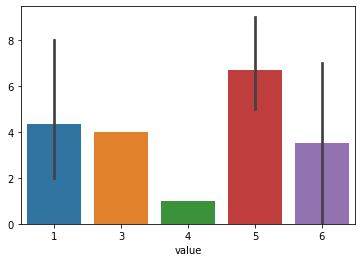

In [59]:
# your code here

#df1.plot(kind="bar", figsize=(10,6), rot=0)
sns.barplot(x=df1["value"], y=df1.index)

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

C:\Users\Vithushan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


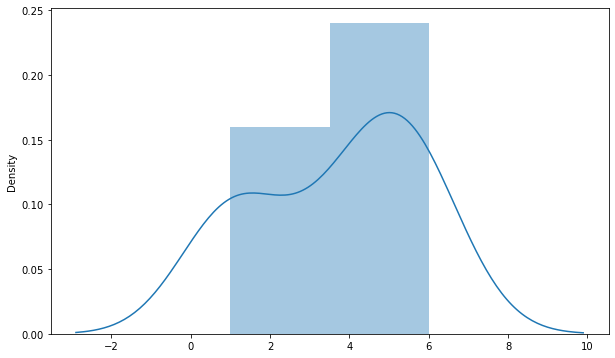

In [38]:
# your code here
plt.figure(figsize=(10,6))
sns.distplot(df1, hist=True)
plt.show()

In [39]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [40]:
# your code here
def mean(d):
   
    return d.sum()/len(d)


mean(df1["value"])

mean(df1)




    
    


value    3.7
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
# your code here
def mean_cal(x):
    f=df1["value"].value_counts().values
    d=df1["value"].value_counts().index
    return sum(f*d)/len(df1["value"])

mean_cal(df1)

3.7

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [47]:
# your code here
def median(x):
    
    if len(df1["value"])%2==0:
        x=(df1["value"][len(df1["value"])//2]+(df1["value"][(len(df1["value"])+1)//2]))/2
    else:
        x=df1["value"][len(df1["value"]+1)//2]
    return x
    
median(df1["value"])

5.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [49]:
# your code here
Q2=median(df1["value"])
Q1=median(Q2)
df1.quantile([.1, .25, .5, .75], axis = 0)

,value
0.10,1.0
0.25,1.5
0.50,4.5
0.75,5.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [9]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
roll_the_dice_hundred = pd.read_csv(r"C:\Users\Vithushan\Downloads\roll_the_dice_hundred.csv", index_col=0)
roll_the_dice_hundred.columns = ['Roll', 'Value']

In [6]:
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values('Value')
sorted_roll_the_dice_hundred

,Roll,Value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


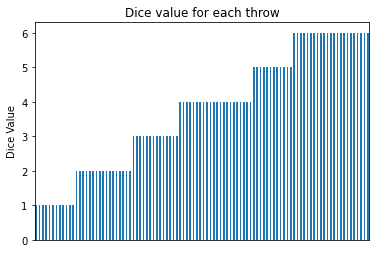

In [10]:
sorted_roll_the_dice_hundred[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

In [3]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [11]:
# your code here
print('Mean Method 1: {}'.format(mean_calculation_method_one(roll_the_dice_hundred)))
print('Mean Method 2: {}'.format(mean_calculation_method_two(roll_the_dice_hundred)))

NameError: name 'mean_calculation_method_one' is not defined

#### 3.- Now, calculate the frequency distribution.


In [12]:
# your code here
frequency = roll_the_dice_hundred['Value'].value_counts(sort=False)
frequency

1    12
2    17
6    23
5    12
4    22
3    14
Name: Value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(0.5, 1.0, 'Histogram')

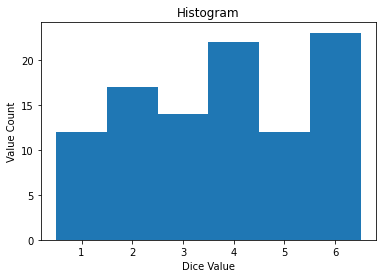

In [13]:
# your code here
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_hundred['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')


In [14]:
"""
your comments here
We know that the probability of each number is the same (1/6), so the frequency of each number should be similar and we should expect to see a uniform histogram. However, we can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4).  
"""

"\nyour comments here\nWe know that the probability of each number is the same (1/6), so the frequency of each number should be similar and we should expect to see a uniform histogram. However, we can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4).  \n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [15]:
# your code here
roll_the_dice_thousand = pd.read_csv(r"C:\Users\Vithushan\Downloads\roll_the_dice_thousand.csv", index_col=0)
roll_the_dice_thousand.columns = ['Roll', 'Value']

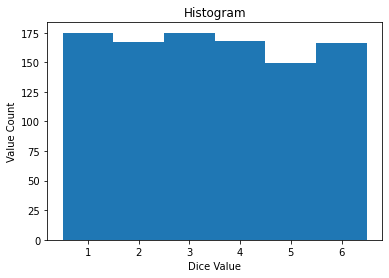

5    149
6    166
1    175
2    167
4    168
3    175
Name: Value, dtype: int64

In [17]:
# Calculate the frequency distribution.
frequency = roll_the_dice_thousand['Value'].value_counts(sort=False)

# Histogram
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_thousand['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

# Show the plot.
plt.show()
frequency

In [16]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

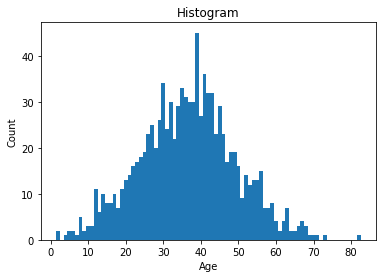

In [19]:
# your code here
ages_population = pd.read_csv(r"C:\Users\Vithushan\Downloads\ages_population.csv")
ages_population = ages_population.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population['observation'].max()) + 1
min_range = int(ages_population['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
# your code here
ages_population['observation'].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

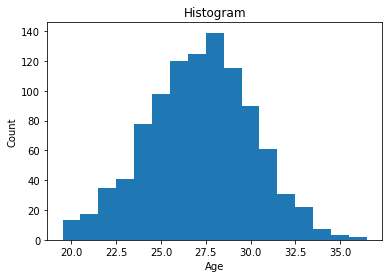

In [21]:
# your code here
# Read the csv
ages_population_2 = pd.read_csv(r"C:\Users\Vithushan\Downloads\ages_population2.csv")
ages_population_2 = ages_population_2.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_2['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_2['observation'].max()) + 1
min_range = int(ages_population_2['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_2['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
your comments here
It seems that this time we have a narrower range of ages. Now, the mean value should be around 27 and the standard deviation around 2. We can see that the people in this neighbourhood are younger compared to the first neighbourhood, where the range was wider and there was more middle-aged people. 
"""

'\nyour comments here\nIt seems that this time we have a narrower range of ages. Now, the mean value should be around 27 and the standard deviation around 2. We can see that the people in this neighbourhood are younger compared to the first neighbourhood, where the range was wider and there was more middle-aged people. \n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [23]:
# your code here
ages_population_2['observation'].describe()

count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

In [24]:
"""
your comments here
The exact results are similar to the ones expected.
"""

'\nyour comments here\nThe exact results are similar to the ones expected.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

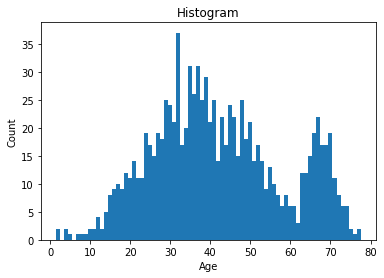

In [25]:
# your code here
# Read the csv
ages_population_3 = pd.read_csv('ages_population3.csv')
ages_population_3 = ages_population_3.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_3['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_3['observation'].max()) + 1
min_range = int(ages_population_3['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_3['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
# your code here
ages_population_3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [27]:
# your code here
ages_population_3['observation'].quantile(0.85)

64.0

In [28]:
"""
your comments here
We can see that the distribution is now formed by two normals. The first one is centered around 35 and is formed by a lot more samples than the second one, which is centered around 68 approximately. 

If we take a look at the quartiles, we can see that 75% of the samples have a value lower or equal to 53, which would be part of the first normal. So the second normal is formed by approximately the 25% of the total samples. If we check the 85% quantile, we can see that 15% of the samples are greater or equal than 64, which is the approximately the limit between both normals. So we can say that, more exactly, the first normal is formed by approximately 85% of the samples while the second is formed by 15% of the samples. 

The mean is higher than the median because it is more affected by the second normal. However, the median is lower because it is more robust to extreme values.
"""

'\nyour comments here\nWe can see that the distribution is now formed by two normals. The first one is centered around 35 and is formed by a lot more samples than the second one, which is centered around 68 approximately. \n\nIf we take a look at the quartiles, we can see that 75% of the samples have a value lower or equal to 53, which would be part of the first normal. So the second normal is formed by approximately the 25% of the total samples. If we check the 85% quantile, we can see that 15% of the samples are greater or equal than 64, which is the approximately the limit between both normals. So we can say that, more exactly, the first normal is formed by approximately 85% of the samples while the second is formed by 15% of the samples. \n\nThe mean is higher than the median because it is more affected by the second normal. However, the median is lower because it is more robust to extreme values.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [29]:
# your code here
sumamry_df = pd.concat([ages_population['observation'], 
                        ages_population_2['observation'], 
                        ages_population_3['observation']], 
                        axis=1, keys=['df1', 'df2', 'df3'])
sumamry_df.describe()

,df1,df2,df3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


In [ ]:
"""
your comments here
"""